In [72]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Set the path to the file you'd like to load
file_path = "netflix_titles.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "shivamb/netflix-shows",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

/var/folders/jq/3spgz0t105z044g721j_zwdw0000gn/T/ipykernel_16173/3433799785.py:14: DeprecationWarning:

load_dataset is deprecated and will be removed in future version.



In [4]:
# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Task 1

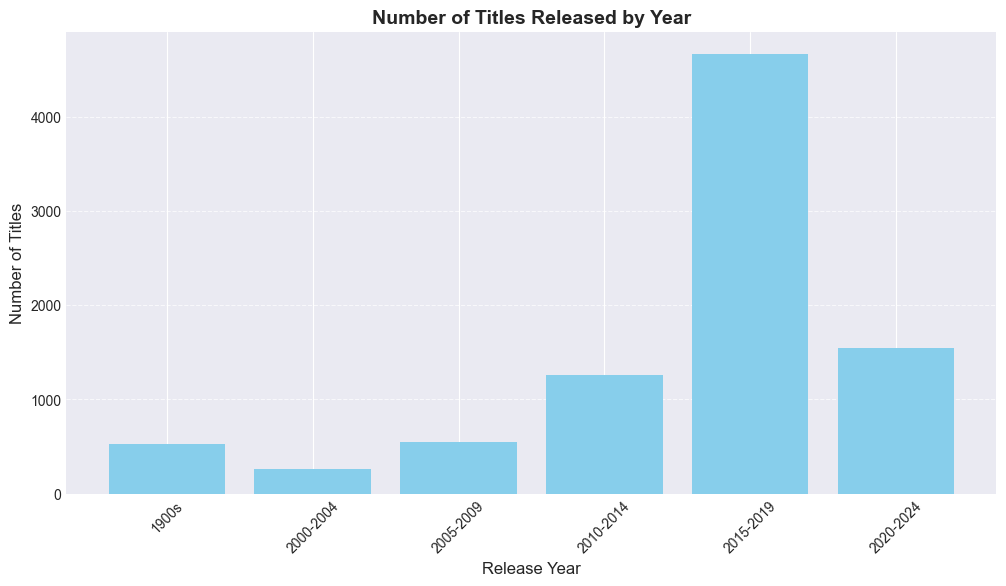

In [103]:
def categorize_year(year):
    if year < 2000:
        return "1900s"
    start = (year // 5) * 5
    end = start + 4
    return f"{start}-{end}"

df["year_group"] = df["release_year"].apply(categorize_year)

rating_year_counts = df.groupby(["year_group", "rating"]).size().unstack(fill_value=0)

year_order = ["1900s"] + sorted(
    [col for col in rating_year_counts.index if col != "1900s"], 
    key=lambda x: int(x.split("-")[0])
)

rating_year_counts = rating_year_counts.loc[year_order]

plt.figure(figsize=(12, 6))

plt.bar(rating_year_counts.index, rating_year_counts.sum(axis=1), color='skyblue')

plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.title('Number of Titles Released by Year', fontsize=14, fontweight='bold')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [110]:
def categorize_year(year):
    if year < 2000:
        return "1900s"
    start = (year // 5) * 5
    end = start + 4
    return f"{start}-{end}"

df["year_group"] = df["release_year"].apply(categorize_year)

rating_year_counts = df.groupby(["year_group", "rating"]).size().unstack(fill_value=0)

year_order = ["1900s"] + sorted(
    [col for col in rating_year_counts.index if col != "1900s"], 
    key=lambda x: int(x.split("-")[0])
)

rating_year_counts = rating_year_counts.loc[year_order]

fig = px.bar(
    rating_year_counts,
    x=rating_year_counts.index,
    y=rating_year_counts.sum(axis=1),
    labels={'x': 'Release Year', 'y': 'Number of Titles'},
    title='Number of Titles Released by Year'
)

fig.update_traces(marker_color='skyblue')
fig.update_layout(xaxis_title='Release Year', yaxis_title='Number of Titles')

fig.show()


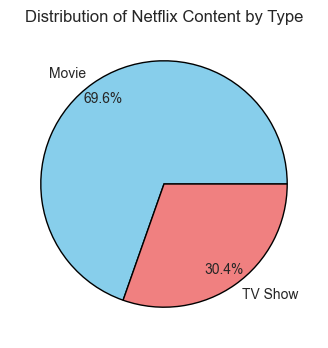

In [97]:
type_counts = df['type'].value_counts().head()

plt.figure(figsize=(5, 4))
plt.pie(
    type_counts.values, 
    labels=type_counts.index, 
    autopct='%1.1f%%',
    colors=['skyblue', 'lightcoral'],
    wedgeprops={'edgecolor': 'black'}, 
    pctdistance=0.85
)

centre_circle = plt.Circle((0, 0), 0.5, fc='white')
plt.title("Distribution of Netflix Content by Type")
plt.show()


In [106]:
type_counts = df['type'].value_counts().head()

fig = go.Figure(
    data=[go.Pie(
        labels=type_counts.index, 
        values=type_counts.values, 
        textinfo='percent',
        marker=dict(colors=['skyblue', 'lightcoral'], line=dict(color='black', width=1))
    )]
)

fig.update_layout(
    title="Distribution of Netflix Content by Type",
    width = 500,
    height = 500
)

fig.show()


# Task 2

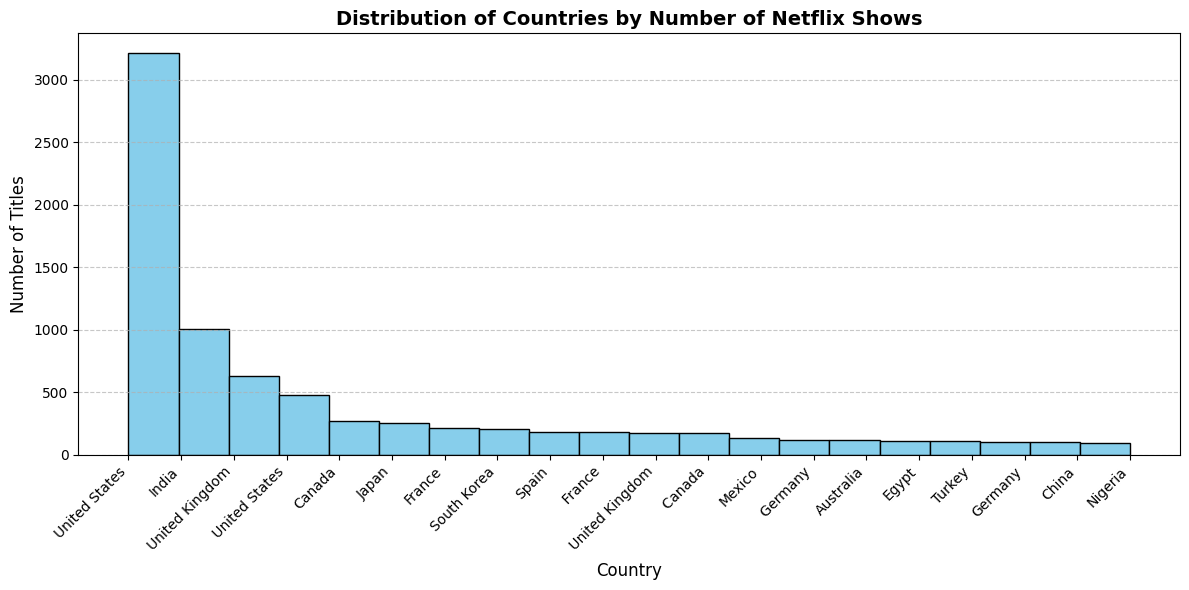

In [ ]:
country_counts = df['country'].str.split(',').explode('country').value_counts().head(20)

plt.figure(figsize=(12, 6))
plt.hist(
    country_counts.index,
    weights=country_counts.values,
    bins=len(country_counts),
    edgecolor='black',
    color='skyblue'
)

plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.title('Distribution of Countries by Number of Netflix Shows', fontsize=14, fontweight='bold')


plt.xticks(rotation=45, ha='right', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  
plt.show()

In [ ]:
# Process data
country_counts = df['country'].str.split(',').explode('country').value_counts().head(20)

# Create Plotly bar chart (equivalent to your histogram)
fig = px.bar(
    x=country_counts.index,
    y=country_counts.values,
    labels={'x': 'Country', 'y': 'Number of Titles'},
    title='Distribution of Countries by Number of Netflix Shows',
    text_auto=True
)

# Customize layout
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Number of Titles',
    xaxis_tickangle=-45,
    bargap=0.1,
    plot_bgcolor='white',
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    yaxis_gridcolor='lightgray'
)

# Show plot
fig.show()

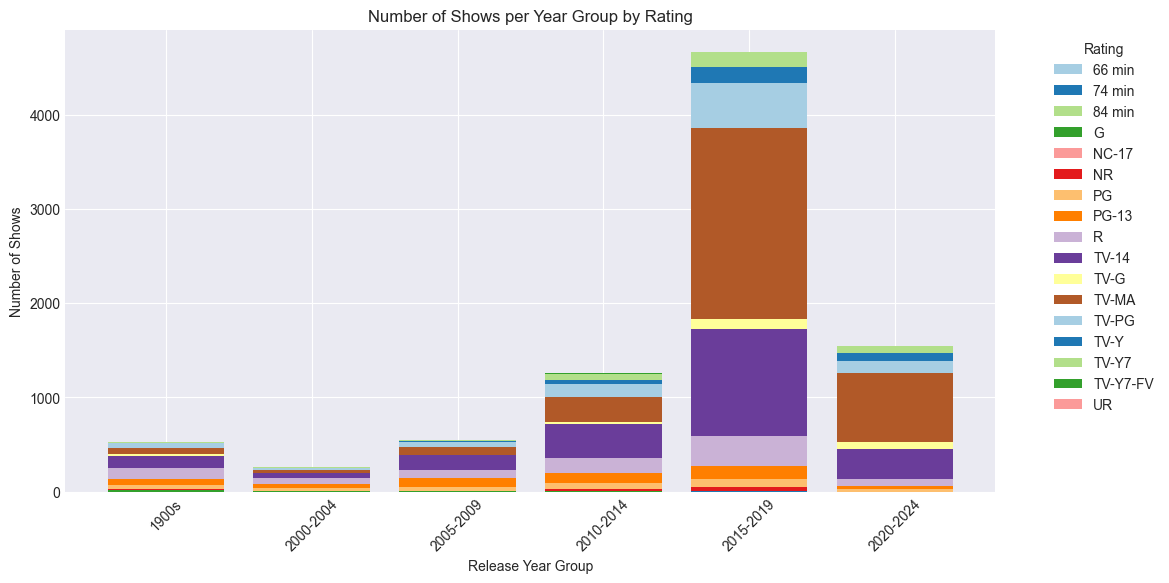

In [94]:
def categorize_year(year):
    if year < 2000:
        return "1900s"
    else:
        start = (year // 5) * 5
        end = start + 4
        return f"{start}-{end}"

df["year_group"] = df["release_year"].apply(categorize_year)

rating_year_counts = df.groupby(["year_group", "rating"]).size().unstack(fill_value=0)

year_order = ["1900s"] + sorted(
    [col for col in rating_year_counts.index if col != "1900s"], 
    key=lambda x: int(x.split("-")[0])
)
rating_year_counts = rating_year_counts.loc[year_order]

colors = plt.cm.Paired.colors

plt.figure(figsize=(12, 6))

bottom_values = [0] * len(rating_year_counts)

for idx, rating in enumerate(rating_year_counts.columns):
    plt.bar(
        rating_year_counts.index, 
        rating_year_counts[rating], 
        bottom=bottom_values, 
        label=rating, 
        color=colors[idx % len(colors)]
    )

    bottom_values += rating_year_counts[rating].values

plt.xlabel("Release Year Group")
plt.ylabel("Number of Shows")
plt.title("Number of Shows per Year Group by Rating")
plt.xticks(rotation=45)
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()


In [ ]:
def categorize_year(year):
    if year < 2000:
        return "1900s"
    else:
        start = (year // 5) * 5
        end = start + 4
        return f"{start}-{end}"

df["year_group"] = df["release_year"].apply(categorize_year)

rating_year_counts = df.groupby(["year_group", "rating"]).size().unstack(fill_value=0)

year_order = ["1900s"] + sorted(
    [col for col in rating_year_counts.index if col != "1900s"], 
    key=lambda x: int(x.split("-")[0])
)
rating_year_counts = rating_year_counts.loc[year_order]

fig = go.Figure()

bottom_values = [0] * len(rating_year_counts)

for idx, rating in enumerate(rating_year_counts.columns):
    fig.add_trace(go.Bar(
        x=rating_year_counts.index,
        y=rating_year_counts[rating],
        name=rating
    ))

fig.update_layout(
    barmode='stack',
    xaxis_title="Release Year Group",
    yaxis_title="Number of Shows",
    title="Stacked Bar Chart: Number of Shows per Year Group by Rating",
    xaxis=dict(tickangle=-45),
    legend_title="Rating"
)

fig.show()


# Task 3

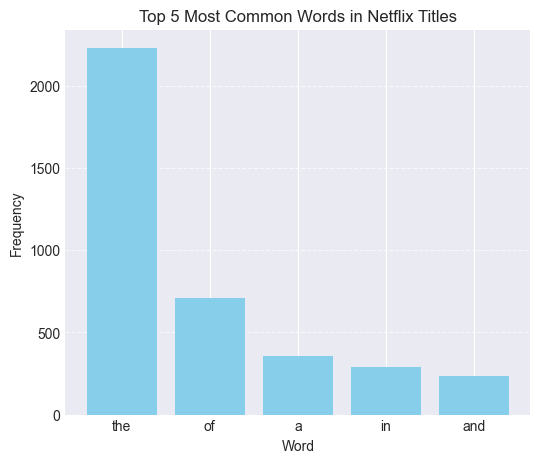

In [112]:
top_words = (
    df['title']
    .str.lower()
    .str.replace(r'[^a-z\s]', '', regex=True)
    .str.split()
    .explode()
    .value_counts()
    .head(5)
)

plt.figure(figsize=(6, 5))
plt.bar(top_words.index, top_words.values, color='skyblue')

plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 5 Most Common Words in Netflix Titles')

plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [93]:
top_words = (
    df['title']
    .str.lower()
    .str.replace(r'[^a-z\s]', '', regex=True)
    .str.split()
    .explode()
    .value_counts()
    .head(5)
)

fig = px.bar(x = top_words.index,
             y = top_words.values,
             title='Top 5 Most Common Words in Netflix Titles',
             text=top_words.values,
             color=top_words.values,
             color_continuous_scale='blues'
)

fig.update_layout(
    xaxis_title='Word',
    yaxis_title='Frequency',
    xaxis=dict(tickfont=dict(size=10)),
    yaxis=dict(showgrid=True, gridcolor="lightgray", griddash="dash"),
    uniformtext_minsize=8,
    uniformtext_mode='hide',
)
fig.show()


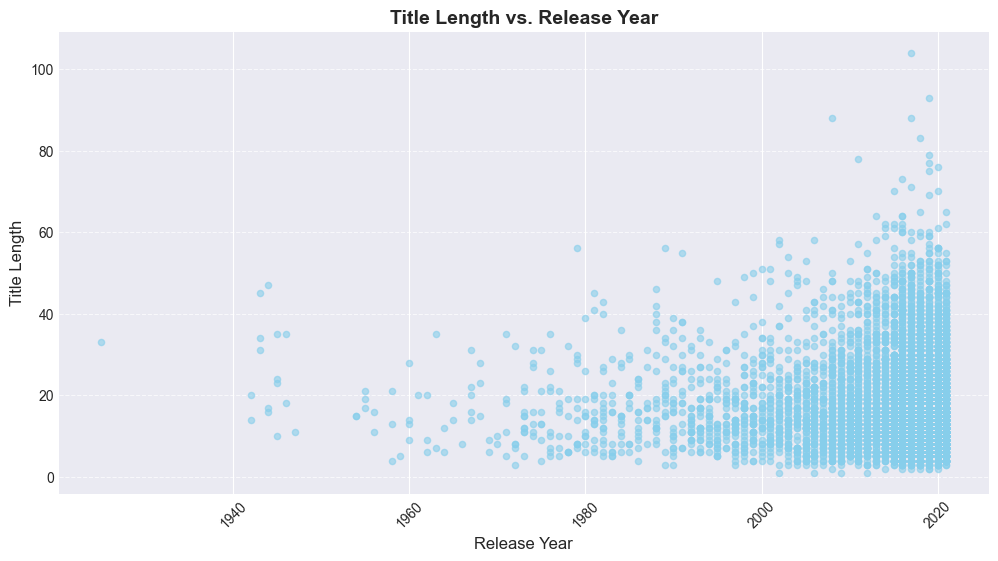

In [77]:
df["title_length"] = df["title"].str.len()

plt.figure(figsize=(12, 6))

plt.scatter(x=df['release_year'], 
            y=df['title_length'], 
            color='skyblue', 
            alpha=0.6,
            s=20)

plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Title Length', fontsize=12)
plt.title('Title Length vs. Release Year', fontsize=14, fontweight='bold')

plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [118]:
df["title"] = df["title"].fillna("")
df["title_length"] = df["title"].str.len()

fig = px.scatter(df, 
                 x="release_year", 
                 y="title_length",
                 size="title_length",
                 size_max=60,
                 color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_layout(
    xaxis_title='Release Year',
    yaxis_title='Title Length',
    title='Title Length vs. Release Year by Rating',
    xaxis=dict(tickangle=-45),
    legend_title="Rating",
)

fig.show()
